In [116]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [117]:
import gc

In [118]:
# Load the NIfTI file
month1 = nib.load('anita_1.nii')
month1_data = month1.get_fdata()
month1_data = month1_data/np.max(month1_data)

month3 = nib.load('anita_3.nii')
month3_data = month3.get_fdata()
month3_data = month3_data/np.max(month3_data)

In [119]:
# Function to convert numpy array to SimpleITK image
def numpy_to_sitk(image_np):
    return sitk.GetImageFromArray(image_np)

# Function to convert SimpleITK image to numpy array
def sitk_to_numpy(image_sitk):
    return sitk.GetArrayFromImage(image_sitk)


In [120]:
month1_sitk = numpy_to_sitk(month1_data)
month3_sitk = numpy_to_sitk(month3_data)

In [121]:
loaded_transform = sitk.ReadTransform("./saved-data/rigid_transform-anita.tfm")
transformed_image_with_loaded_transform = sitk.Resample(month3_sitk, month1_sitk, loaded_transform, sitk.sitkLinear, 0.0, month3_sitk.GetPixelID())
month3_registered = sitk_to_numpy(transformed_image_with_loaded_transform)

In [122]:
scattering = Scattering2D(J=2, shape=month1_data.shape[:-1])

In [127]:
# generate scattering coeffs of all slices of month 1 volume and store them in an array
scattering_month1_slices = []
for i in range(month1_data.shape[2]):
    if i<200 or i>374:
        # create a zero scattering coeff for slices that are not in the volume of interest of size 120x200x81
        scattering_month1_slices.append(np.zeros((120,200,81)))
        continue
            
    scattering_month1_slices.append(scattering(month1_data[:,:,i]))

# generate scattering coeffs of all slices of month 3 volume and store them in an array
scattering_month3_slices = []
for i in range(month3_registered.shape[2]):
    if i<200 or i>374:
        scattering_month1_slices.append(np.zeros((120,200,81)))
        continue    
    scattering_month3_slices.append(scattering(month3_registered[:,:,i]))

MemoryError: Unable to allocate 1.54 MiB for an array with shape (1, 248, 408) and data type complex128

In [124]:
del month1_sitk
del month3_sitk
del loaded_transform
del transformed_image_with_loaded_transform
del month1
del month3

In [125]:
gc.collect() 

138150

In [ ]:
scattering_month1_slices_np = np.array(scattering_month1_slices)
scattering_month3_slices_np = np.array(scattering_month3_slices)
#normalize
scattering_month1_slices_np +=np.min(scattering_month1_slices_np)
scattering_month1_slices_np /=np.max(scattering_month1_slices_np)
scattering_month3_slices_np +=np.min(scattering_month3_slices_np)
scattering_month3_slices_np /=np.max(scattering_month3_slices_np)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (625,) + inhomogeneous part.

In [ ]:
del scattering_month1_slices
del scattering_month3_slices
gc.collect()

54486

In [ ]:
diff_array = []
for i in range(200,374):
    diff = np.sum(np.abs(scattering_month1_slices_np[i][0] - scattering_month3_slices_np[i][0]))/np.max(scattering_month1_slices_np[i][0])
    diff_array.append(diff)
max_diff_index = np.argmax(diff_array)+200
print(max_diff_index)

258


In [ ]:
print(diff_array)
print(min(diff_array), max(diff_array))
print(np.mean(diff_array))
print(np.std(diff_array))

[1495.6055320325258, 1637.3839591452995, 1686.3138359747122, 1663.7289050321845, 1702.7654952334872, 1661.5270656566415, 1668.5229889703587, 1644.9598196509555, 1450.872539409496, 1632.465606911947, 1688.7413719141116, 1555.5264919045874, 1801.585914025759, 1904.4786673501335, 1915.52376645994, 1901.9330976743313, 1815.0561733391505, 1896.652451215918, 1809.8688750744623, 1869.1645551409645, 1861.2932060411636, 1957.811875316421, 1986.5382761276235, 1913.148596423324, 1858.5313963413978, 1890.6587767998276, 1847.7220904002497, 1925.6449758710003, 1982.7912610051058, 1939.6355001120405, 1985.4347103619389, 1864.1950413031132, 1936.727345676985, 1849.3990016837504, 1818.4196580082735, 1088.6899676180456, 1208.3755357445502, 1245.2863625991376, 1340.0463711855466, 1432.160040069343, 1521.791227290301, 1708.198239129031, 1555.0895304261514, 1944.1916646632028, 1946.2065052960284, 2033.0944334299272, 2019.0867791661756, 1931.2268312804779, 2011.6955789873064, 2038.4648034373631, 1959.584508

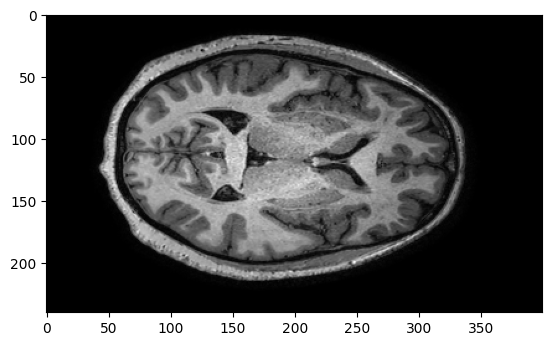

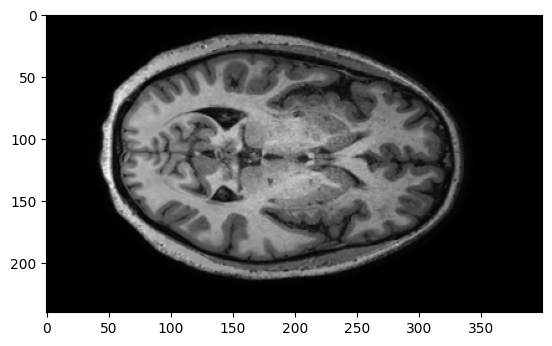

In [ ]:
plt.imshow(month1_data[:,:,max_diff_index], cmap='gray')
plt.show()
plt.imshow(month3_registered[:,:,max_diff_index], cmap='gray')
plt.show()

In [ ]:
# take difference of each slice of month1_data and month3_registered and find max index and plot the slices
diff_array = []
for i in range(200,374):
    diff = np.sum(np.abs(month1_data[:,:,i] - month3_registered[:,:,i]))/np.max(month1_data[:,:,i])
    diff_array.append(diff)
max_diff_index = np.argmax(diff_array)+200
print(max_diff_index)

253


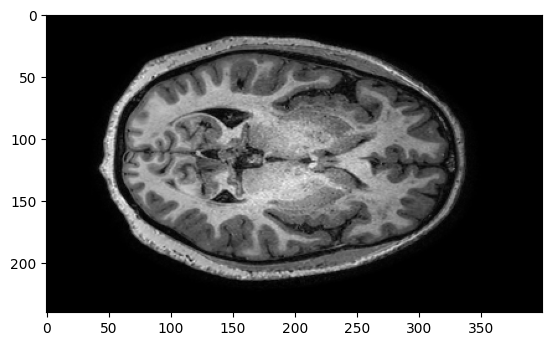

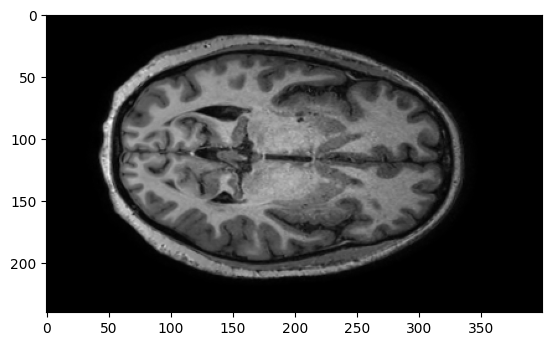

253


In [ ]:
plt.imshow(month1_data[:,:,max_diff_index], cmap='gray')
plt.show()
plt.imshow(month3_registered[:,:,max_diff_index], cmap='gray')
plt.show()
print(max_diff_index)

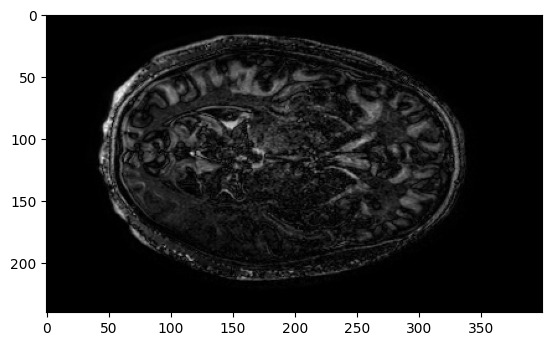

In [ ]:
max_diff_image = np.abs(month1_data[:,:,max_diff_index] - month3_registered[:,:,max_diff_index])
plt.imshow(max_diff_image, cmap='gray')

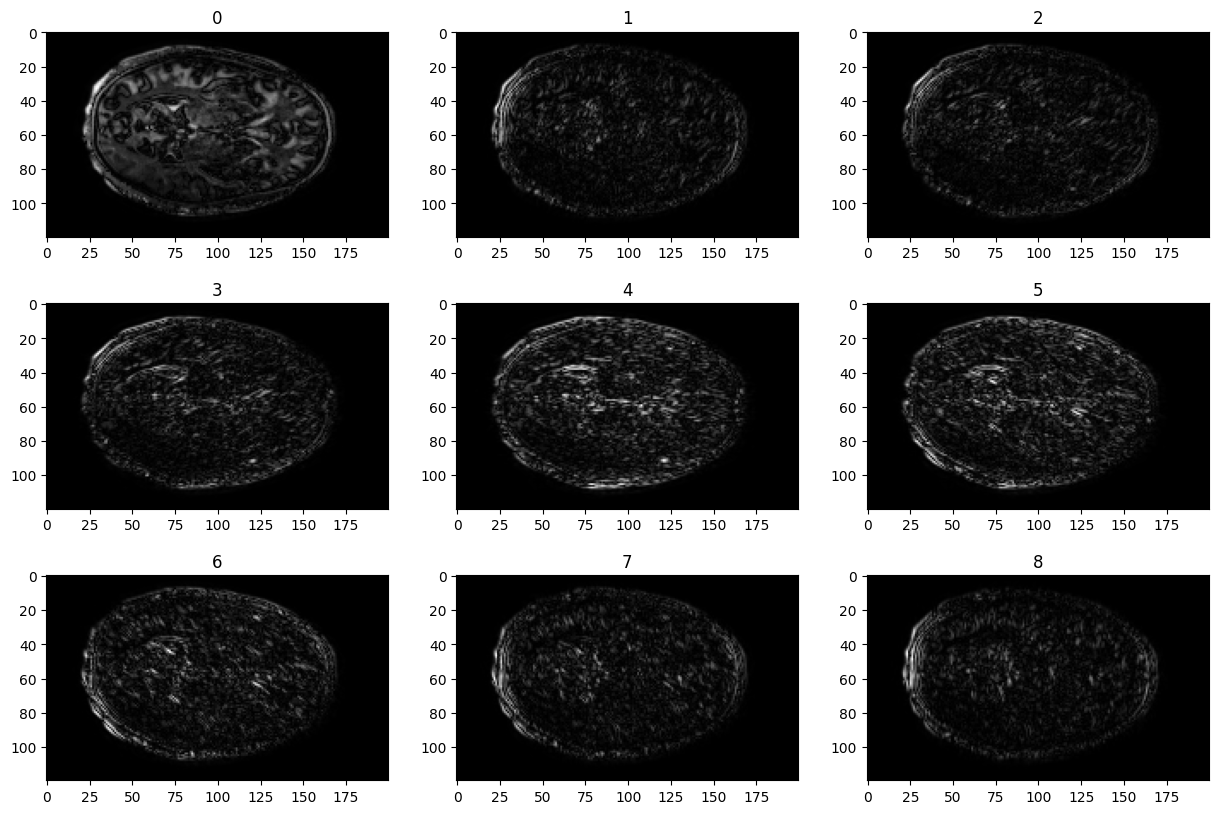

In [ ]:
max_diff_scattering_diff = np.abs(scattering_month1_slices_np[253] - scattering_month3_slices_np[253])
# plt.imshow(max_diff_scattering_diff[0], cmap='gray')
fig, ax = plt.subplots(3, max_diff_scattering_diff.shape[0]//3, figsize=(15, 10))
# plot all the scattering coeffs diff
for i in range(max_diff_scattering_diff.shape[0]):
    ax[i//3][i%3].set_title(f"{i}")
    ax[i//3][i%3].imshow(max_diff_scattering_diff[i], cmap='gray')
    # plt.show()